# Capstone Project 3 Data Wrangling & Exploratory Data Analysis

## Data Wrangling

In [1]:
# Importing the neccessary packages and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
print(os.getcwd())

C:\Users\adre9\Springboard 2024\Springboard_2024_GH\Capstone Project 3\Data Wrangling and EDA


In [3]:
# Function to check the shape of the dataframe
def df_shape(df):
    rows = df.shape[0]
    features = df.shape[1]
    print(f'{rows} rows, {features} features')

In [4]:
stroke_df = pd.read_csv('healthcare_dataset_stroke_data.csv')
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
df_shape(stroke_df)

5110 rows, 12 features


In [6]:
# Checking missing values
print(stroke_df.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


*BMI* is the only feature with missing values. Let's take a look at the distribution of what is there.

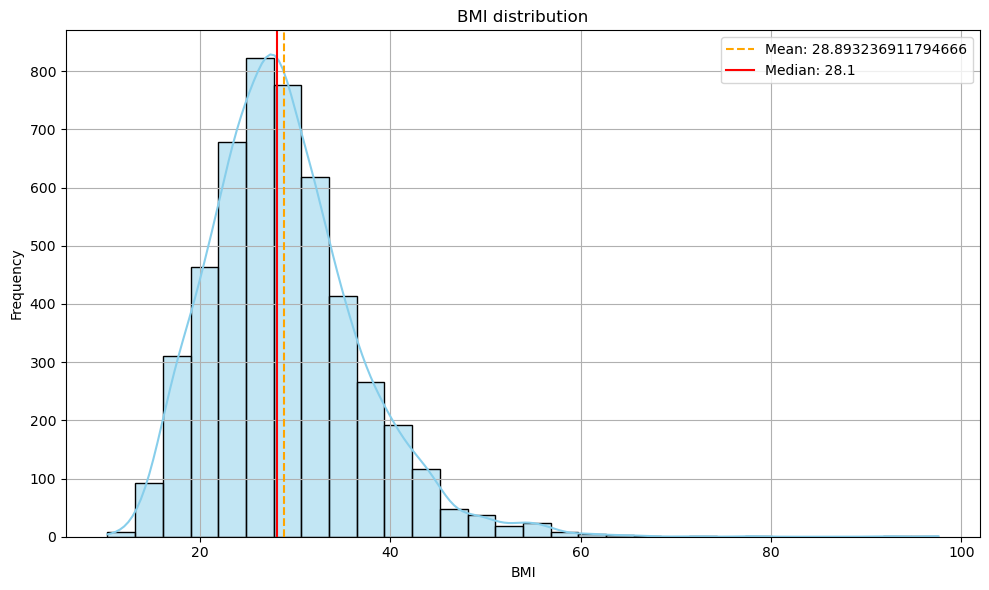

In [7]:
# Plot the BMI distribution before deciding to impute
plt.figure(figsize=(10,6))
sns.histplot(stroke_df['bmi'], kde=True, bins=30, color='skyblue')
plt.axvline(x=stroke_df['bmi'].mean(), color='orange', label=f'Mean: {stroke_df['bmi'].mean()}',linestyle='--')
plt.axvline(x=stroke_df['bmi'].median(), color='red', label=f'Median: {stroke_df['bmi'].median()}',linestyle='-')
plt.title('BMI distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Since meand and median are close together, we will impute with the BMI median since it is outlier proof.

In [8]:
# Imputing the BMI feature with the median
median_bmi = stroke_df['bmi'].median()
stroke_df['bmi'] = stroke_df['bmi'].fillna(median_bmi)

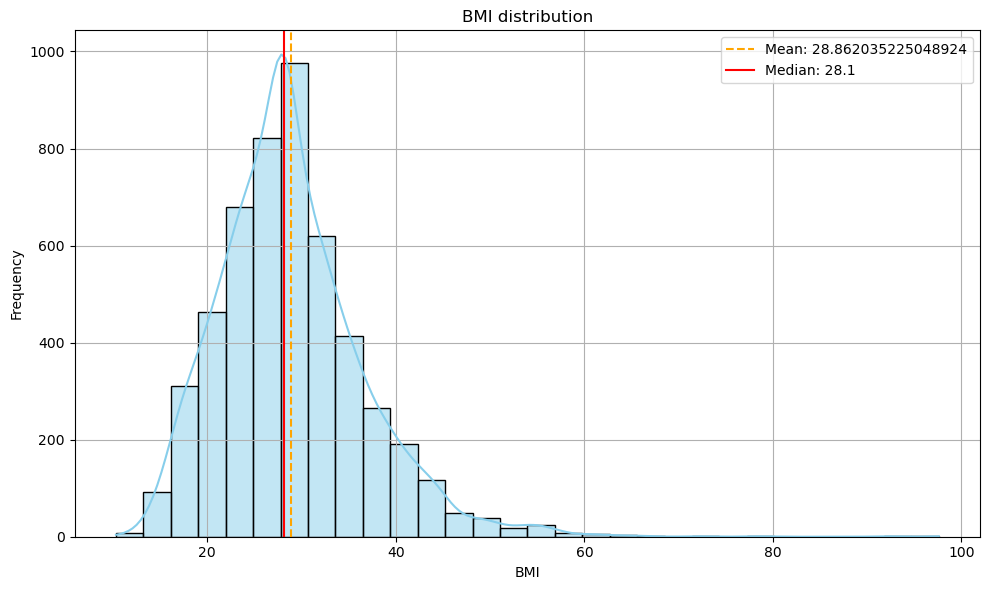

In [9]:
# Plotting the dsitribution with the filled in BMI values
plt.figure(figsize=(10,6))
sns.histplot(stroke_df['bmi'], kde=True, bins=30, color='skyblue')
plt.axvline(x=stroke_df['bmi'].mean(), color='orange', label=f'Mean: {stroke_df['bmi'].mean()}',linestyle='--')
plt.axvline(x=stroke_df['bmi'].median(), color='red', label=f'Median: {stroke_df['bmi'].median()}',linestyle='-')
plt.title('BMI distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('imputed_BMI_distribution.jpg')
plt.show()

In [10]:
df_shape(stroke_df)

5110 rows, 12 features


In [11]:
print(stroke_df.isnull().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [12]:
stroke_df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [13]:
# Checking for duplicates
stroke_df.duplicated().any().sum()

0

Since there aren't any duplicate rows and the number of unique values of "id" is the same as the number of rows of the data, it means that there aren't anymore input errors into the data and that each observation is unique.

We'll go ahead and drop 'id' since it won't be used in the model.

In [14]:
# Dropping 'id'
stroke_df = stroke_df.drop(labels='id', axis=1)
stroke_df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


In [15]:
df_shape(stroke_df)

5110 rows, 11 features


With no missing values or duplicates, we can begin with the EDA.

In [16]:
# Saving the wrangled data into df for EDA
df = stroke_df.copy()

## Exploratory Data Analysis

Let's check out some basic info for it first.

In [17]:
# Info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB
None


In [18]:
# Numeric data description table
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Hypertension, heart_disease, and stroke are binary categorical features.

In [19]:
# Closer look at the categorical features

cat_cols = df.columns.drop(labels=['age', 'avg_glucose_level', 'bmi'])

for col in cat_cols:
    unique_values = df[col].unique()
    print(f'Unique values in {col}: {unique_values}')

Unique values in gender: ['Male' 'Female' 'Other']
Unique values in hypertension: [0 1]
Unique values in heart_disease: [1 0]
Unique values in ever_married: ['Yes' 'No']
Unique values in work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique values in Residence_type: ['Urban' 'Rural']
Unique values in smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Unique values in stroke: [1 0]


## Features Overview

### Categorical Features:
- **gender**: Gender of the patient. 3 unique values of "male", "female", or "other"
- **hypertension**: Binary categorical variable. 0 = patient doesn't have hypertension, 1 = patient has hypertension.
- **heart_disease**: Binary categorical variable. 0 = patient doesn't have a heart disease, 1 = patient has a heart disease.
- **ever_married**: Binary categorical variable if the patient has ever been married. "Yes" or "No"
- **work_type**: Shows the employment type for the patient. 'Children' meaning the patient is a child and isn't employed.
- **residence_type**: Binary categorical variable that shows if the patient lives in a rural or urban area.
- **smoking_status**: The recorded status of the patient's smoking history.
- **stroke**: Binary categorical variable if the patient suffered a stroke. 0 = no stroke, 1 = stroke **Target variable**

### Continuous Features
- **age**: The age of the patient. All numbers between 0 and 1 are infants before turning a year old with their age recorded as a decimal of a year.
    - Ex: 0.08 being 0.08 of a year, or roughly 1 month old.
- **avg_glucose_level**: The average glucose level recorded from the patient. Measured in mg/dL
- **bmi**: The recorded Body Mass Index of the patient. 

#### Let's take a look at the target variable itself first. The distribution of recorded strokes in the data.

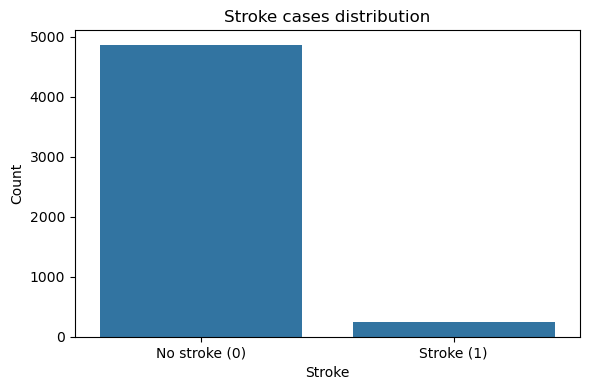

stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64


In [20]:
# Plotting the distribution of strokes in the column
plt.figure(figsize=(6,4))
sns.countplot(x='stroke', data=df)
plt.title('Stroke cases distribution')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.xticks([0,1], ['No stroke (0)', 'Stroke (1)'])
plt.tight_layout()
plt.savefig('Stroke_case_dsitribution_plot.jpg')
plt.show()

print(df['stroke'].value_counts(normalize=True)*100)

There is a very strong imbalance between the number of recorded strokes and no strokes.

We will have to perform either SMOTE, class weighting, or under/oversampling later during the modeling step.

#### Distributions of continuous variables

Let's look at the data distribution of the 3 continuous variables (age, bmi, avg glucose levels).

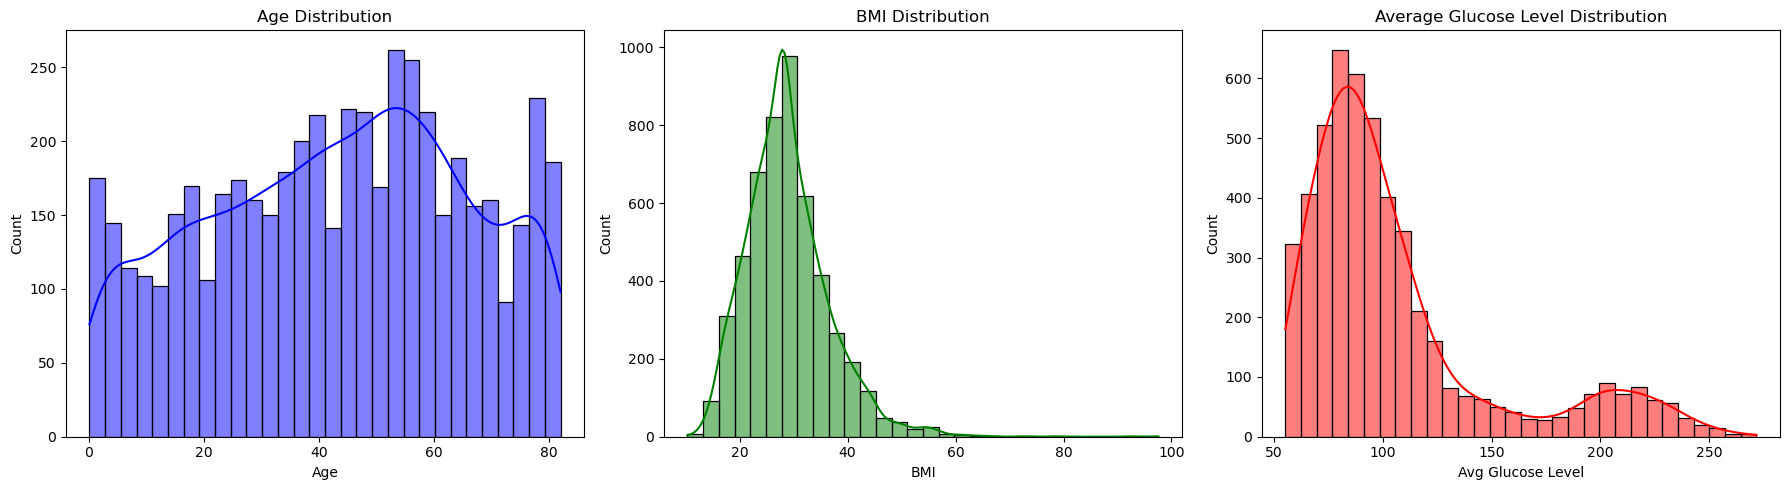

In [21]:
fig, ax = plt.subplots(1,3, figsize=(18,5))

# Age plot
sns.histplot(data=df['age'], kde=True, ax=ax[0], bins=30, color='blue')
ax[0].set_title('Age Distribution')
ax[0].set_xlabel('Age')

# BMI plot
sns.histplot(data=df['bmi'], kde=True, ax=ax[1], bins=30, color='green')
ax[1].set_title('BMI Distribution')
ax[1].set_xlabel('BMI')

# Glucose plot
sns.histplot(data=df['avg_glucose_level'], kde=True, ax=ax[2], bins=30, color='red')
ax[2].set_title('Average Glucose Level Distribution')
ax[2].set_xlabel('Avg Glucose Level')

plt.tight_layout()
plt.savefig('count_dist_age_bmi_gluc.jpg')
plt.show()

- **Age** is only slightly left-skewed and has high presence of much older individuals.
- **BMI** looks to have a bit of a normal distribution with a thin right tail with those few high values worth looking at for later.
- **Glucose** is right-skewed and bi-modal. A lot of the patients are clustered under 150 mg/dL, but there's a tail that extends to beyond 250 mg/dL.

Let's take a look at these same variables by stroke occurance to see if anything sticks out.

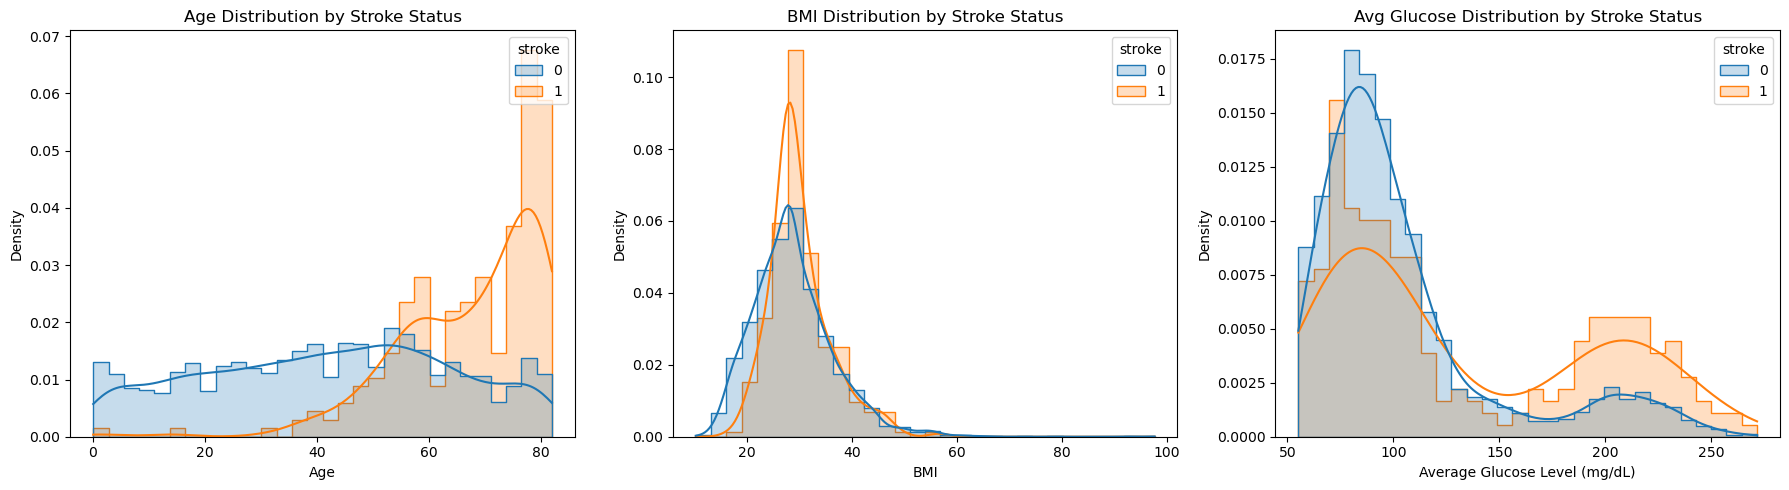

In [22]:
# Plotting variables distributions by stroke occurance

fig, ax = plt.subplots(1,3,figsize=(18,5))

# Age
sns.histplot(data=df, x='age', hue='stroke', kde=True, bins=30, ax=ax[0], element='step', stat='density', common_norm=False)
ax[0].set_xlabel('Age')
ax[0].set_title('Age Distribution by Stroke Status')

# BMI
sns.histplot(data=df, x='bmi', hue='stroke', kde=True, bins=30, ax=ax[1], element='step', stat='density', common_norm=False)
ax[1].set_xlabel('BMI')
ax[1].set_title('BMI Distribution by Stroke Status')

# Glucose
sns.histplot(data=df, x='avg_glucose_level', hue='stroke', kde=True, bins=30, ax=ax[2], element='step', stat='density', common_norm=False)
ax[2].set_xlabel('Average Glucose Level (mg/dL)')
ax[2].set_title('Avg Glucose Distribution by Stroke Status')

plt.tight_layout()
plt.savefig('cont_vars_by_stroke.jpg')
plt.show()

- The stroke cases in the **age** plot are skewed towards the older patients.
- The density distribution of no-stroke and stroke patients in the **BMI** plot are very similar with a high overlap.
- For glucose levels over 150 there are more stroke cases than no-cases.

Let's take a look at the outliers for **bmi** and **glucose**

In [23]:
# Function to get IQR bounds

def get_outlier_bounds(feat):
    Q1 = feat.quantile(0.25)
    Q3 = feat.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Bounds for BMI
bmi_lower, bmi_upper = get_outlier_bounds(df['bmi'])
bmi_outliers = df[(df['bmi'] < bmi_lower) | (df['bmi'] > bmi_upper)]

# Bounds for Glucose
glucose_lower, glucose_upper = get_outlier_bounds(df['avg_glucose_level'])
glucose_outliers = df[(df['avg_glucose_level'] < glucose_lower) | (df['avg_glucose_level'] > glucose_upper)]

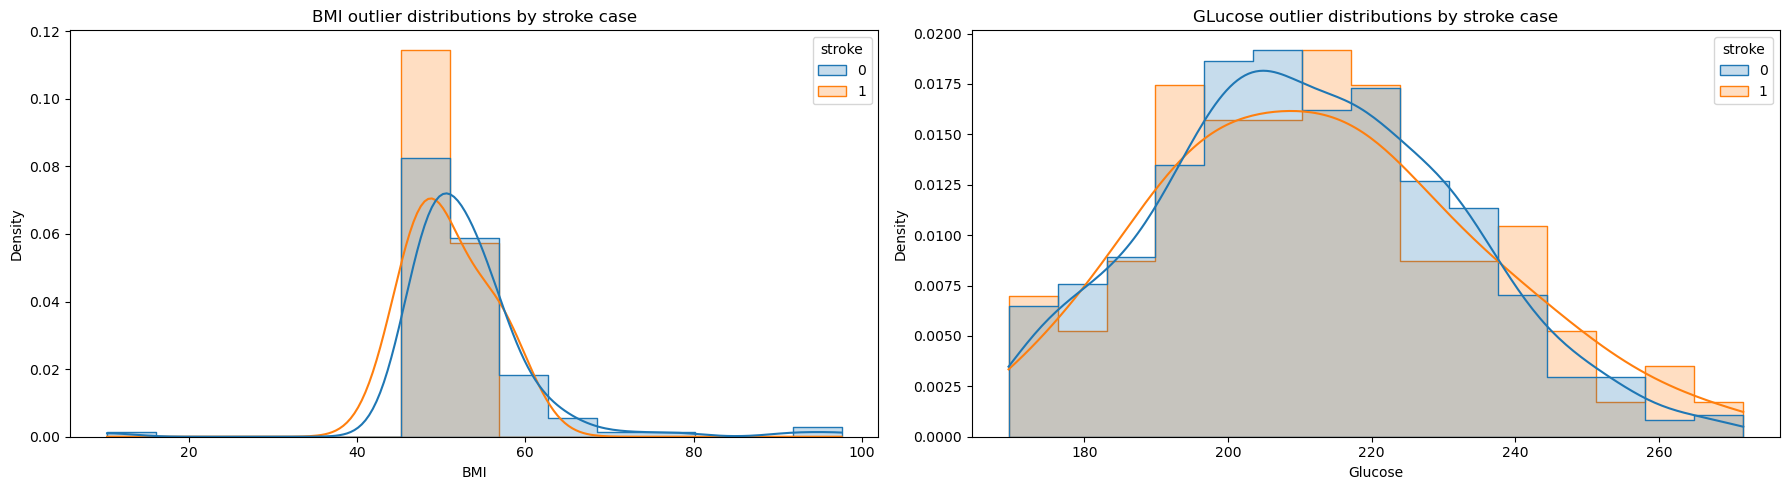

In [24]:
# Plot of bmi and glucose outliers

fig, ax = plt.subplots(1,2, figsize=(18,5))

# BMI
sns.histplot(data=bmi_outliers, x='bmi', kde=True, bins=15, ax=ax[0], element='step', stat='density', hue='stroke', common_norm=False)
ax[0].set_xlabel('BMI')
ax[0].set_title('BMI outlier distributions by stroke case')

# GLucose
sns.histplot(data=glucose_outliers, x='avg_glucose_level', kde=True, ax=ax[1], bins=15, element='step', stat='density', hue='stroke', common_norm=False)
ax[1].set_xlabel('Glucose')
ax[1].set_title('GLucose outlier distributions by stroke case')

plt.tight_layout()
plt.show()

- There is a spresence of stroke cases amongst the high BMI levels, but it isn't dominant.
    - It may be worth capping the BMI levels 
- However, ther is a stronger concentration of sroke cases at the high end of the glucose levels.
    - The glucose levels may be a strong factor to stroke cases. 

#### Distributions of categorical variables

We'll take a look at the distribution of no-stroke and stroke cases amongst the categorical variables

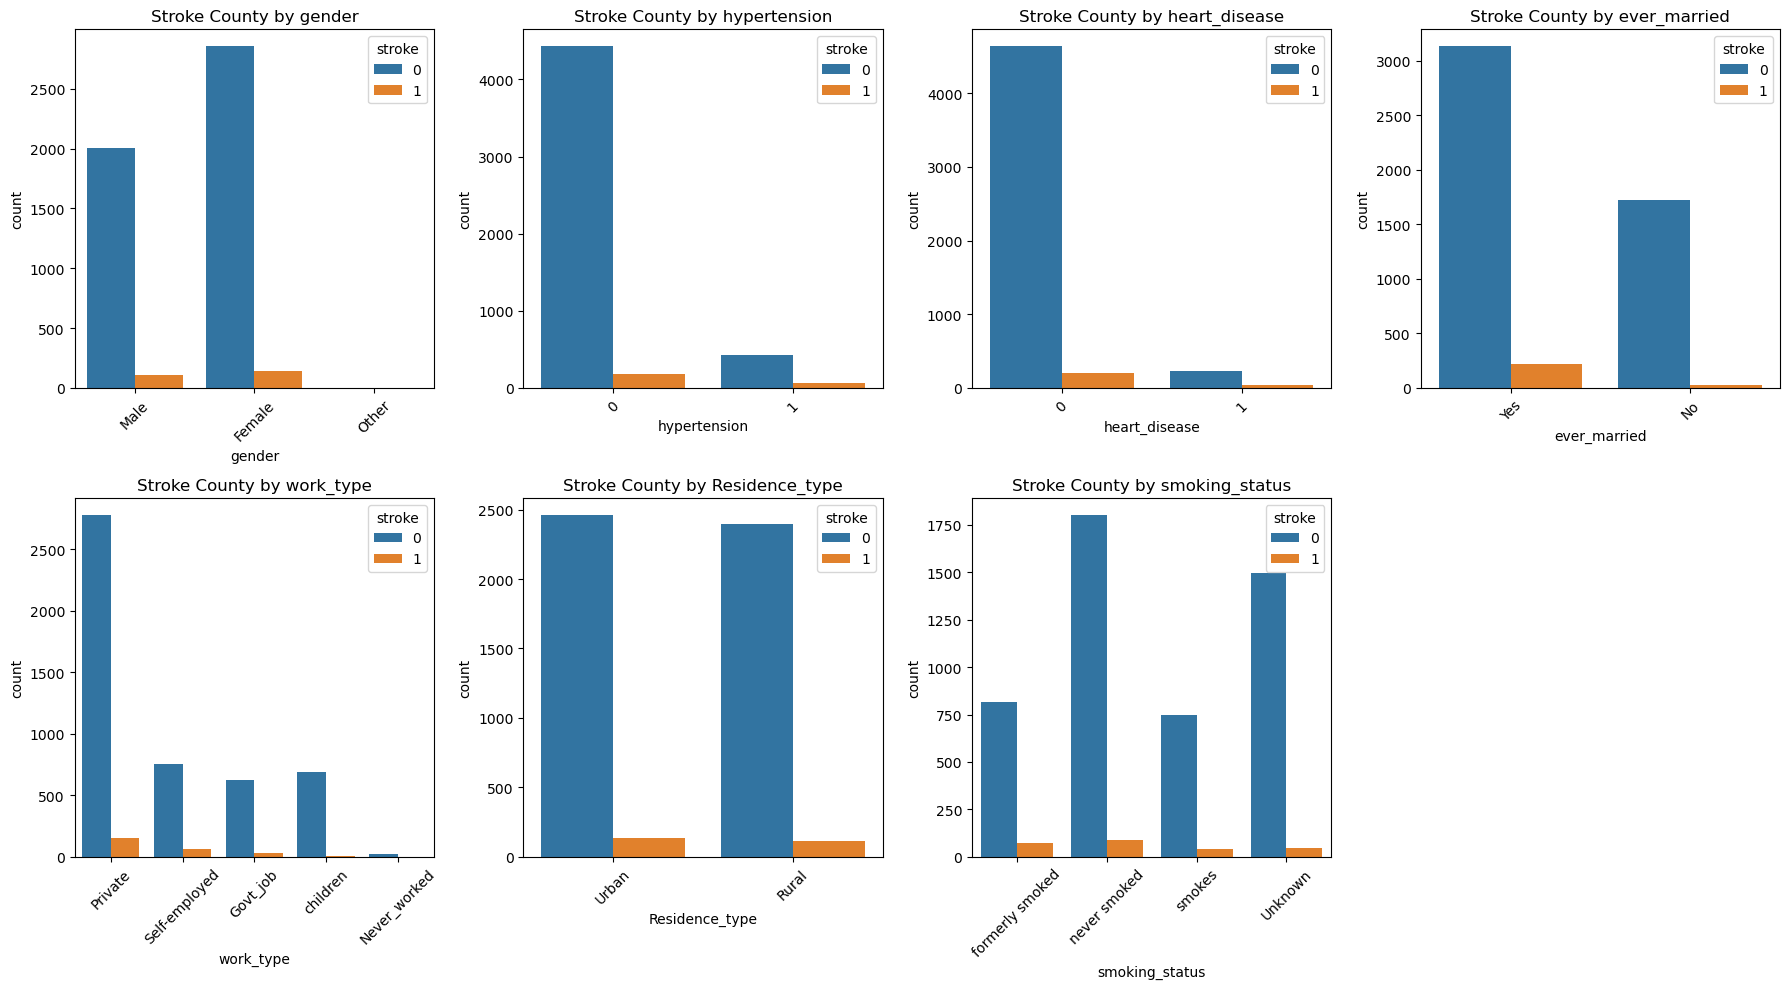

In [25]:
# Categorical features
cat_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Plotting the stroke rates across the categorical features
fig, ax = plt.subplots(2,4, figsize=(18,10))
ax = ax.flatten()

for idx, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, hue='stroke', ax=ax[idx])
    ax[idx].set_title(f'Stroke County by {col}')
    ax[idx].tick_params(axis='x', rotation=45)

# Hiding unused subplots
for j in range(len(cat_cols), len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.savefig('stroke_dist_by_cat.jpg')
plt.show()

- *Gender* has an even distribution of strokes between male and female.
    - Although there is a bit of an imbalance of the groups represented.
- Despite the low count of stroke cases, both *hypertension* and *heart_disease* have higher proportions of stroke cases with patients that have records of hypertension or a heart disease.
    - Once again, these 2 features have a strong imbalance in terms of positive vs negative cases as there is significantly more cases of negative hypertension and heart disease cases.  
- More strokes cases for **yes** in the *ever_married* category. Could be due to the case that more older people likely to be married.
- **Private** and **Self-employed** are the 2 leading groups in *work_type* for stroke cases.
- Even distribution of stroke cases between **urban** and **rural** for *residence_type*.
- *smoking_status* has about an even distribution of stroke cases amongst all the groups, but the **unknown** group is quite a big group itself and may need to have special handling later.

**Proportions of stroke cases vs no-cases by category**

To make the visualization easier we will plot the normalized percentages of strokes vs no-stroke cases by category groups.

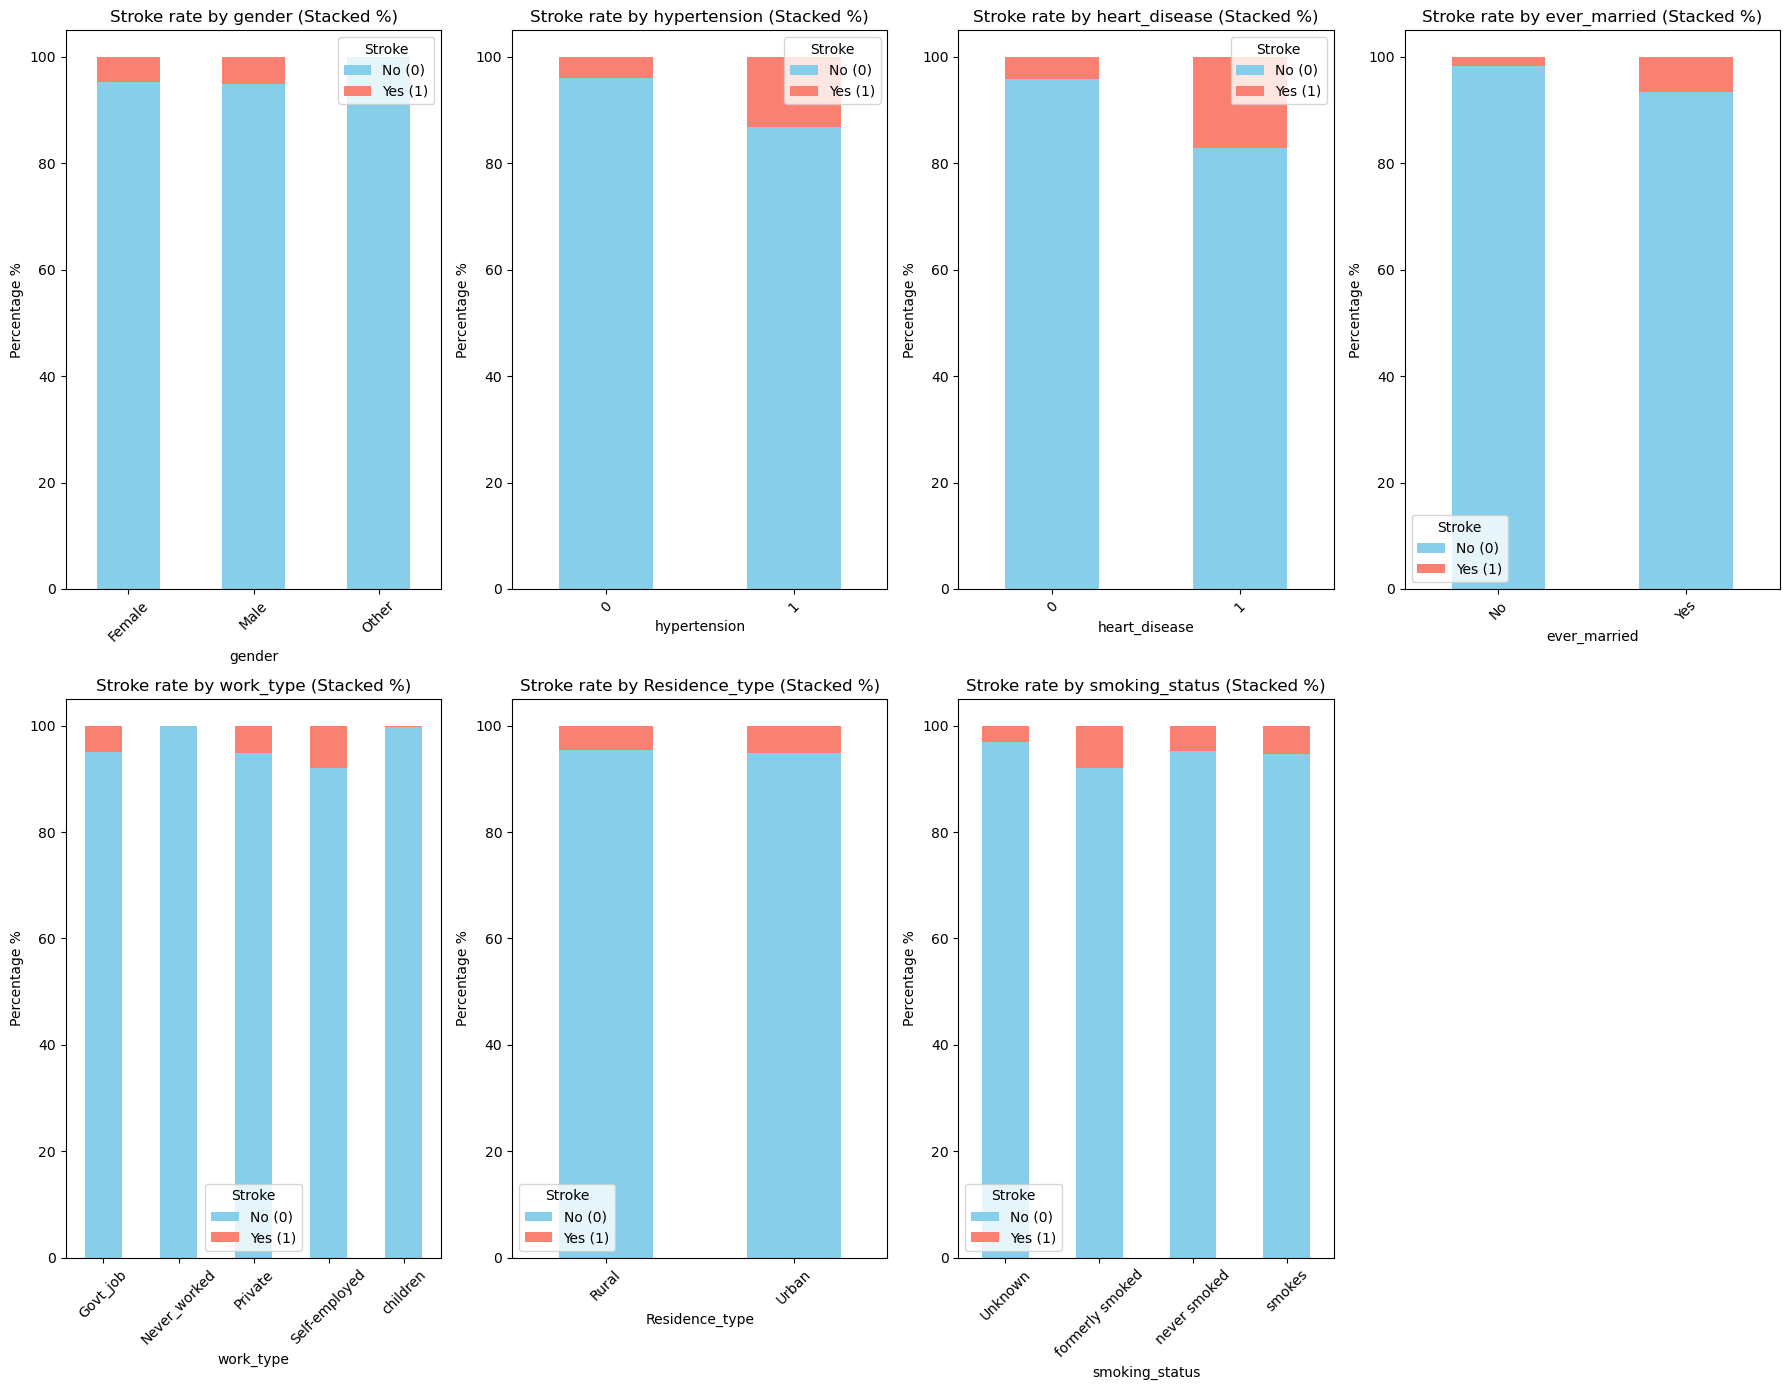

In [26]:
fig, ax = plt.subplots(2, 4, figsize=(18,14))
ax = ax.flatten()

for idx, col in enumerate(cat_cols):

    # Counts stroke=0 and stroke=1 with each category
    count_data = df.groupby([col, 'stroke']).size().unstack(fill_value=0)

    # Converting to pct
    pct_data = count_data.div(count_data.sum(axis=1), axis=0) * 100

    # Stacked bar chart
    pct_data[[0,1]].plot(kind='bar', stacked=True, ax=ax[idx], color=['skyblue','salmon'])
    ax[idx].set_title(f'Stroke rate by {col} (Stacked %)')
    ax[idx].set_ylabel('Percentage %')
    ax[idx].set_xlabel(col)
    ax[idx].legend(title='Stroke', labels=['No (0)', 'Yes (1)'])
    ax[idx].tick_params(axis='x', rotation=45)

# Hide unused axes
for j in range(len(cat_cols), len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.savefig('stroke_pct_by_cat.jpg')
plt.show()

What stands out are the higher percentages of stroke cases for the positive cases of *hypertension* and *heart_disease*, those who have been married, **self_employed** patients, and noticeably those who **formerly_smoked** compared to **never_smoked**.

It is possible that the positive cases for those who said yes to **ever_married** are older patients. It also could be possible that the positive cases that formerly smoked are also older and quit smoking years ago.

Let's take a look at comparing age to the features here with the noticeable higher percentage of positive stroke cases in their respective groups (ever_married, hypertension, heart_disease, work_type, and smoking status).

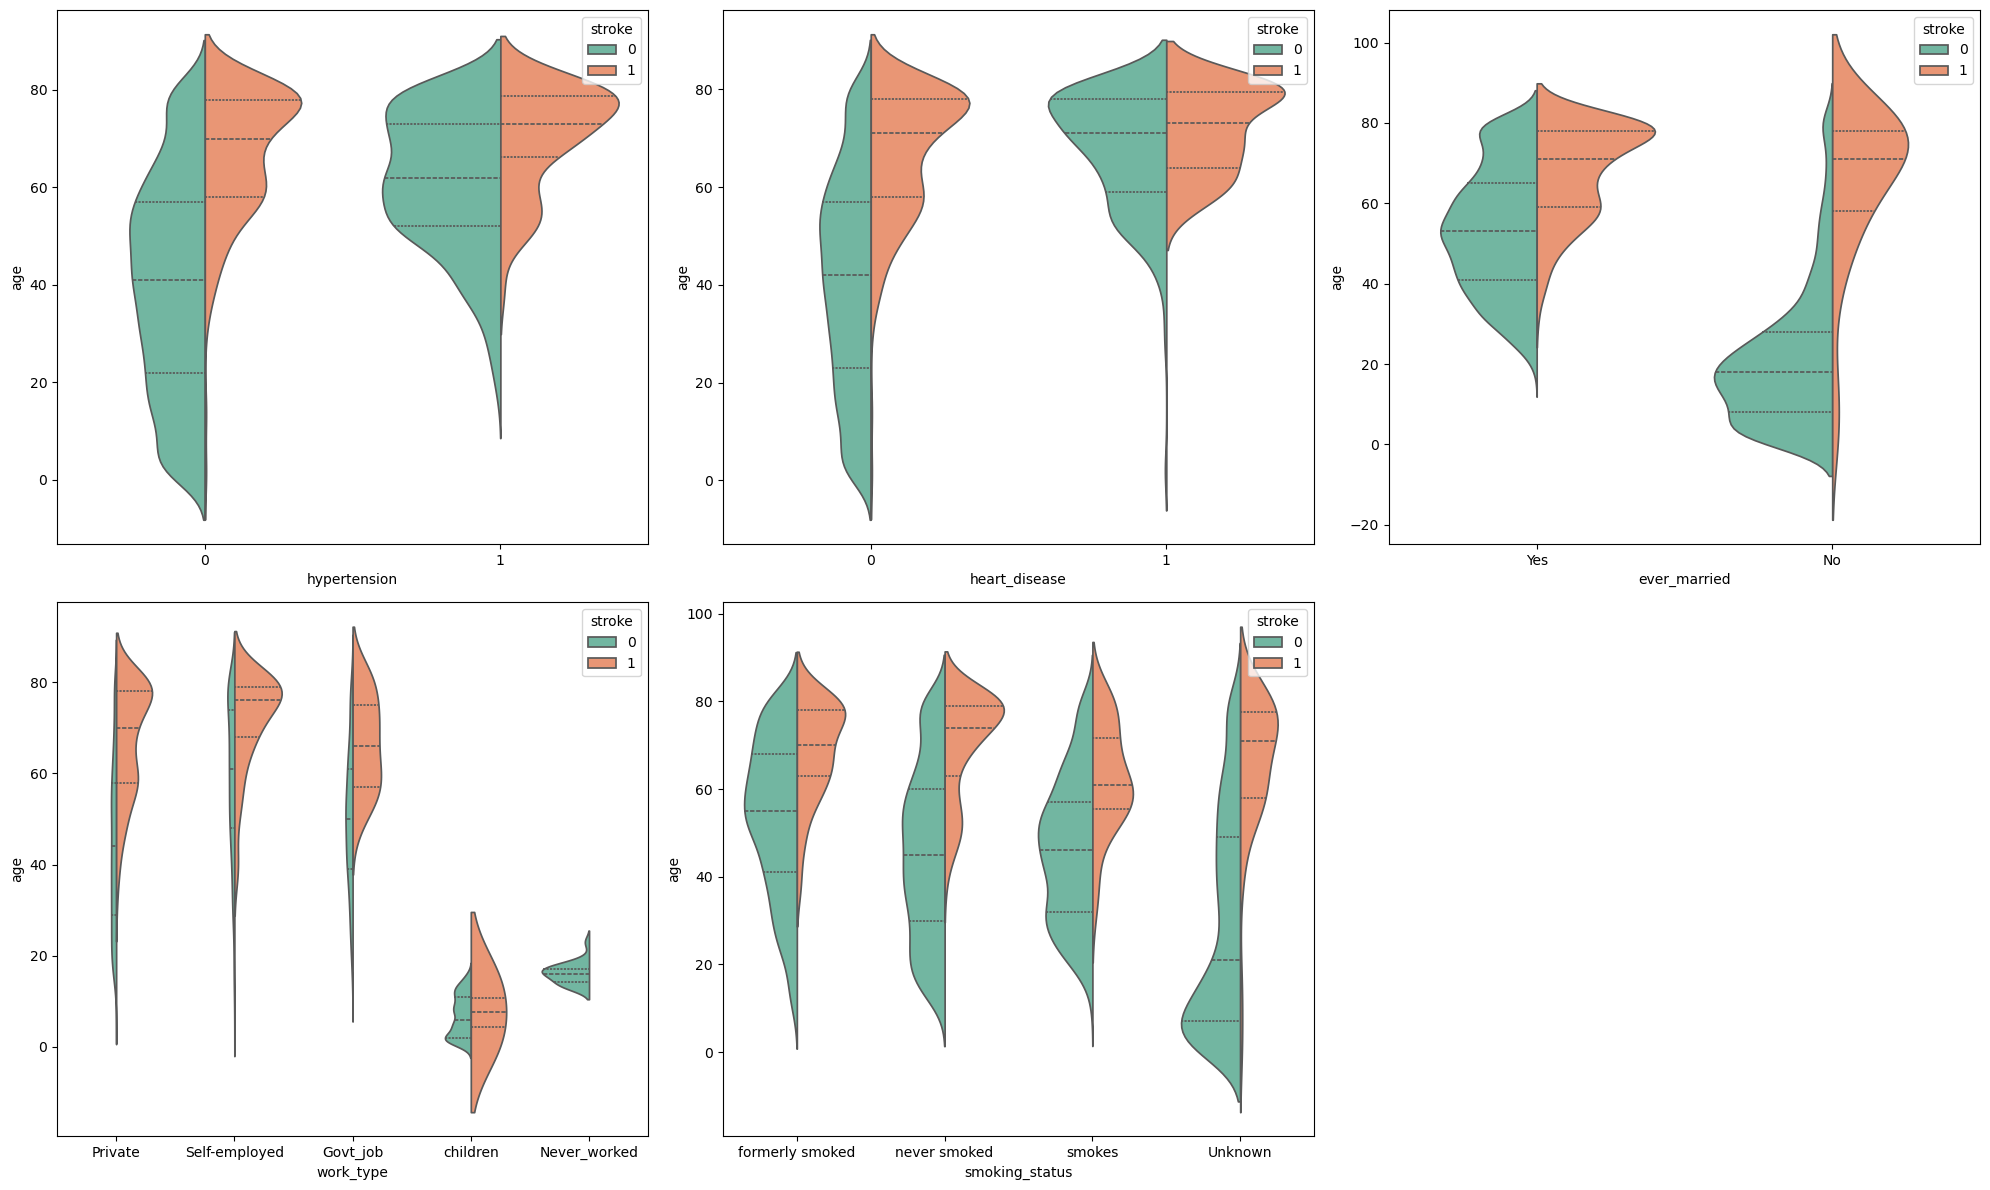

In [30]:
# Our categories of interest
selected_cats = ['hypertension', 'heart_disease', 'ever_married', 'work_type', 'smoking_status']

fig, axes = plt.subplots(2,3, figsize=(20,12))
axes = axes.flatten()


# For this we will do violin plots since this multivariable
for idx, col in enumerate(selected_cats):
    sns.violinplot(data=df, x=col, y='age', hue='stroke', dodge=True, split=True, 
                   hue_order=[0,1], palette='Set2', inner='quartile', ax=axes[idx])
    ax[idx].set_title(f'Age distribution by {col} and stroke status')
    ax[idx].tick_params(axis='x', rotation=45)
    ax[idx].legend(title='Stroke', labels=['No', 'Yes'])

# Hiding unused plots
for j in range(len(selected_cats), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('age_cat_feats_violin_no_blue.jpg')
plt.show()

**Note**: I have not been able to get the density of non-stroke data to properly render for the first 3 groups shown in the *work_type* subplot.

I will make a boxplot of these 3 groups separately.

Text(0.5, 1.0, 'Age distribution of patients')

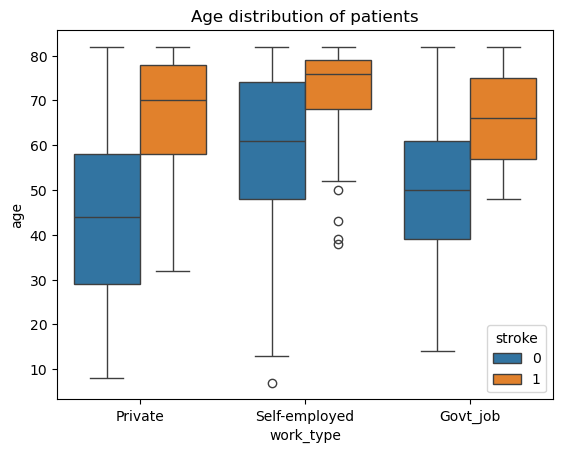

In [31]:
sns.boxplot(data=df[(df['work_type'] != 'children')&(df['work_type'] != 'Never_worked')], x='work_type', y='age', hue='stroke')
plt.title('Age distribution of patients')

- Positive *Hypertension* and *heart_disease* values seem to be the most present among older patients, reinforcing the idea that age as a strong confounding variable.
- Those who have been married and have suffered a stroke are quite older.
- Those who work government jobs or are self-employed skew older.
- Former smokers with stroke are older and those who never smoked span the same age range, but there aren't as many.

Finally, let's make a correlation heatmap of our numeric values to see if there are any correlations to consider for the pre-processing, training, and modeling.

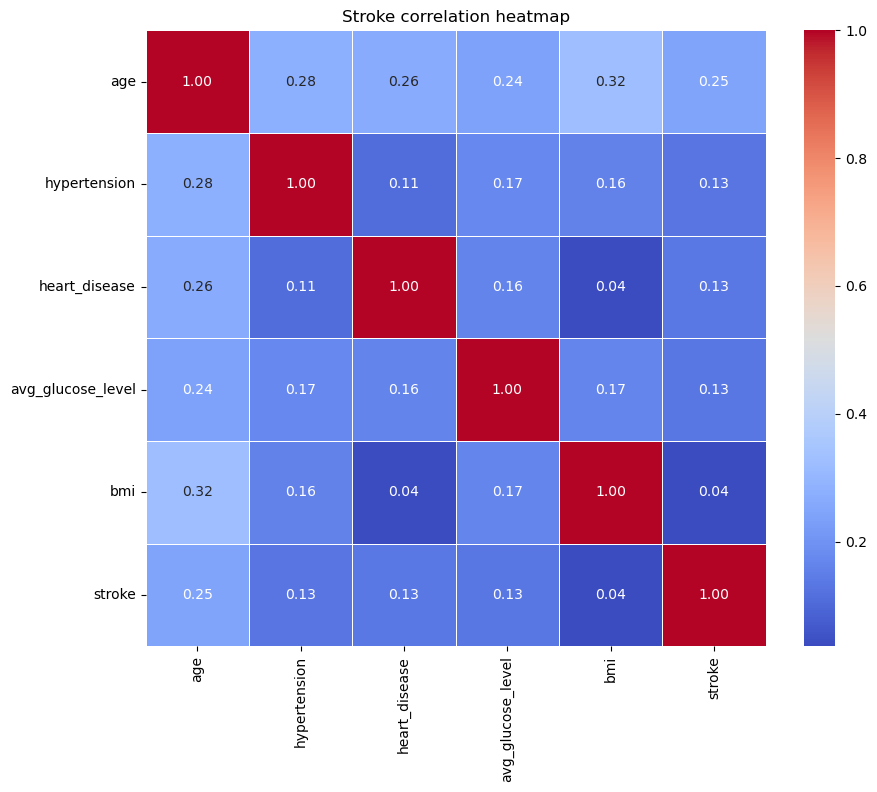

In [32]:
num_cols = df.select_dtypes(include=['float64', 'int64'])

corr_matrix = num_cols.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Stroke correlation heatmap')
plt.savefig('stroke_corr_heatmap.jpg')
plt.show()

**Correlation heatmap takeaways**:

- *Age* has the strongest positive correlation with stroke at +0.25. This seems to be the standout predictor.
- *avg_clucose_level*, *hypertension*, and *heart_disease* have the next strongest at +0.13, a moderately positive correlation.
  - Although weaker signals, it may be worth considering using these for feature engineering when pre-processing the data for modeling.
- *BMI* has a weak, near-zero correlation, but doesn't rule out non-linear effects.

### EDA takeaways:

- Positive stroke cases seem to be a bit more common amongst individuals who:
    - Are older
    - Have higher *avg_glucose_levels*
    - Test positive for *hypertension* or a *heart_disease*
        - Disparity of representation between the positive and negative cases of these features need to be handled during the next steps. 
- *BMI* is a less conclusive feature, but will hold on to for potential feature engineering.
- Features such as *ever_married* and *work_type* are more influenced by age.
- *Gender* and *residence_type* don't show as strong predictive power alone.
- Our target variable *stroke* also has a significantly large disparity between positive and negative cases that needs to be consindered during the next steps.